In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import linregress

In [2]:
df = pd.read_csv("daily_data.csv",parse_dates=['DATE'])

In [3]:
df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   STATION                                     2668 non-null   int64         
 1   DATE                                        2668 non-null   datetime64[ns]
 2   REPORT_TYPE                                 2668 non-null   object        
 3   SOURCE                                      2668 non-null   int64         
 4   BackupElements                              2668 non-null   object        
 5   BackupElevation                             2668 non-null   int64         
 6   BackupEquipment                             2668 non-null   object        
 7   BackupLatitude                              2668 non-null   float64       
 8   BackupLongitude                             2668 non-null   float64       
 9   BackupNa

In [5]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
STATION,2668.0,72518014735.0,72518014735.0,72518014735.0,72518014735.0,72518014735.0,72518014735.0,0.0
DATE,2668,2018-10-01 14:07:27.346326784,2015-01-01 23:59:00,2016-11-29 17:59:00,2018-10-02 11:59:00,2020-08-03 05:59:00,2022-05-31 23:59:00,NaN
SOURCE,2668.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0
BackupElevation,2668.0,260.0,260.0,260.0,260.0,260.0,260.0,0.0
BackupLatitude,2668.0,42.68975,42.6812,42.6918,42.6918,42.6918,42.6918,0.004187
BackupLongitude,2668.0,-73.828268,-73.83109,-73.83109,-73.83109,-73.83109,-73.8165,0.005764
DailyAverageDewPointTemperature,2668.0,38.217766,-19.0,24.0,38.0,55.0,73.0,19.11625
DailyAverageDryBulbTemperature,2668.0,50.107571,-3.0,35.0,51.0,67.0,87.0,18.74731
DailyAverageRelativeHumidity,2668.0,66.085082,24.0,57.0,66.0,76.0,100.0,13.401359
DailyAverageSeaLevelPressure,2668.0,30.031945,29.24,29.88,30.02,30.18,30.74,0.223771


In [6]:
result = linregress(df.index, df['DailyDepartureFromNormalAverageTemperature'])
print('Temperature Trend (°F/Year):', result.slope)

Temperature Trend (°F/Year): -0.0006488234619728866


In [7]:
df['SOURCE'].value_counts()

SOURCE
6    2668
Name: count, dtype: int64

TEMPERATURE RELATED ANALYSIS

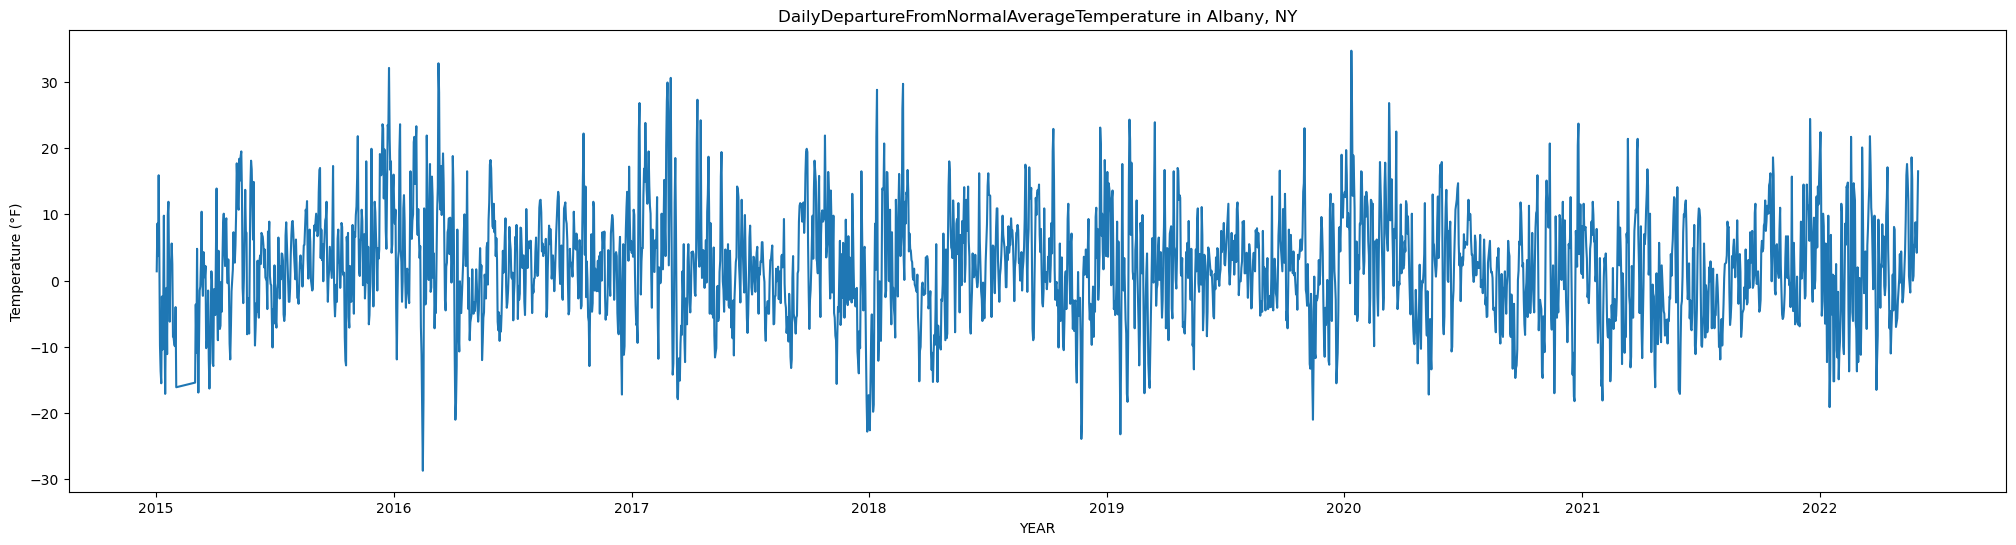

In [8]:
plt.figure(figsize=(25,6))
plt.plot(df['DATE'], df['DailyDepartureFromNormalAverageTemperature'])
plt.title('DailyDepartureFromNormalAverageTemperature in Albany, NY')
plt.xlabel('YEAR')
plt.ylabel('Temperature (°F)')
plt.show()

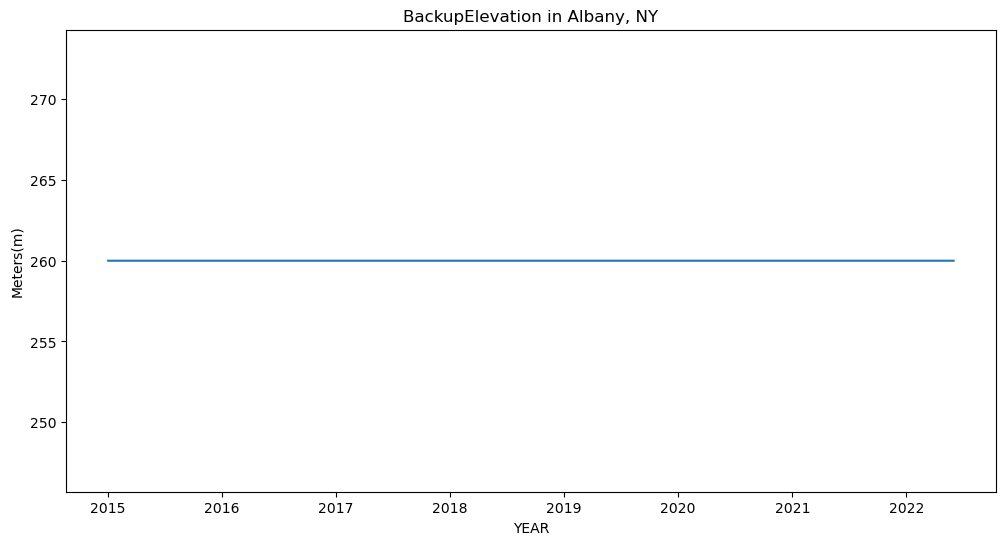

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['DATE'], df['BackupElevation'])
plt.title('BackupElevation in Albany, NY')
plt.xlabel('YEAR')
plt.ylabel('Meters(m)')
plt.show()

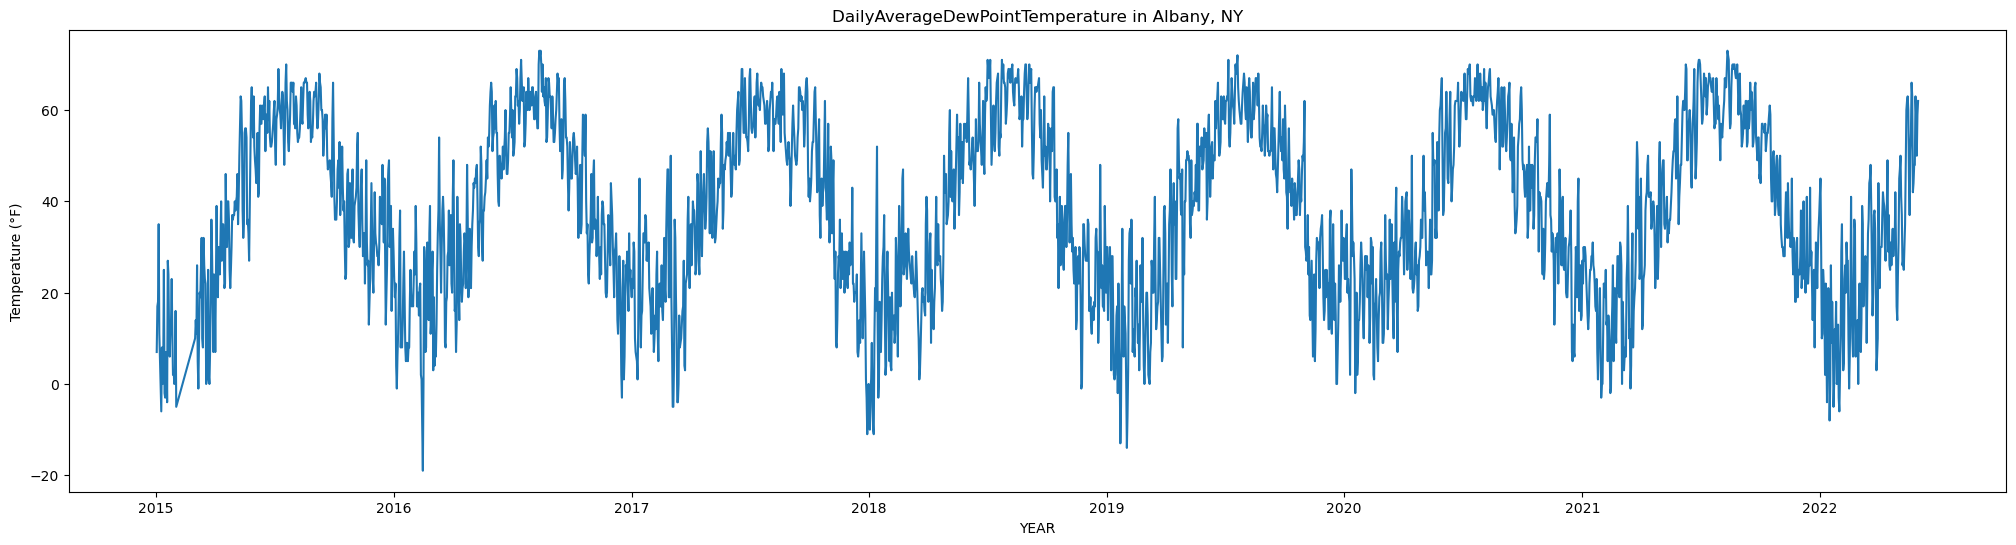

In [10]:
plt.figure(figsize=(25,6))
plt.plot(df['DATE'], df['DailyAverageDewPointTemperature'])
plt.title('DailyAverageDewPointTemperature in Albany, NY')
plt.xlabel('YEAR')
plt.ylabel('Temperature (°F)')
plt.show()

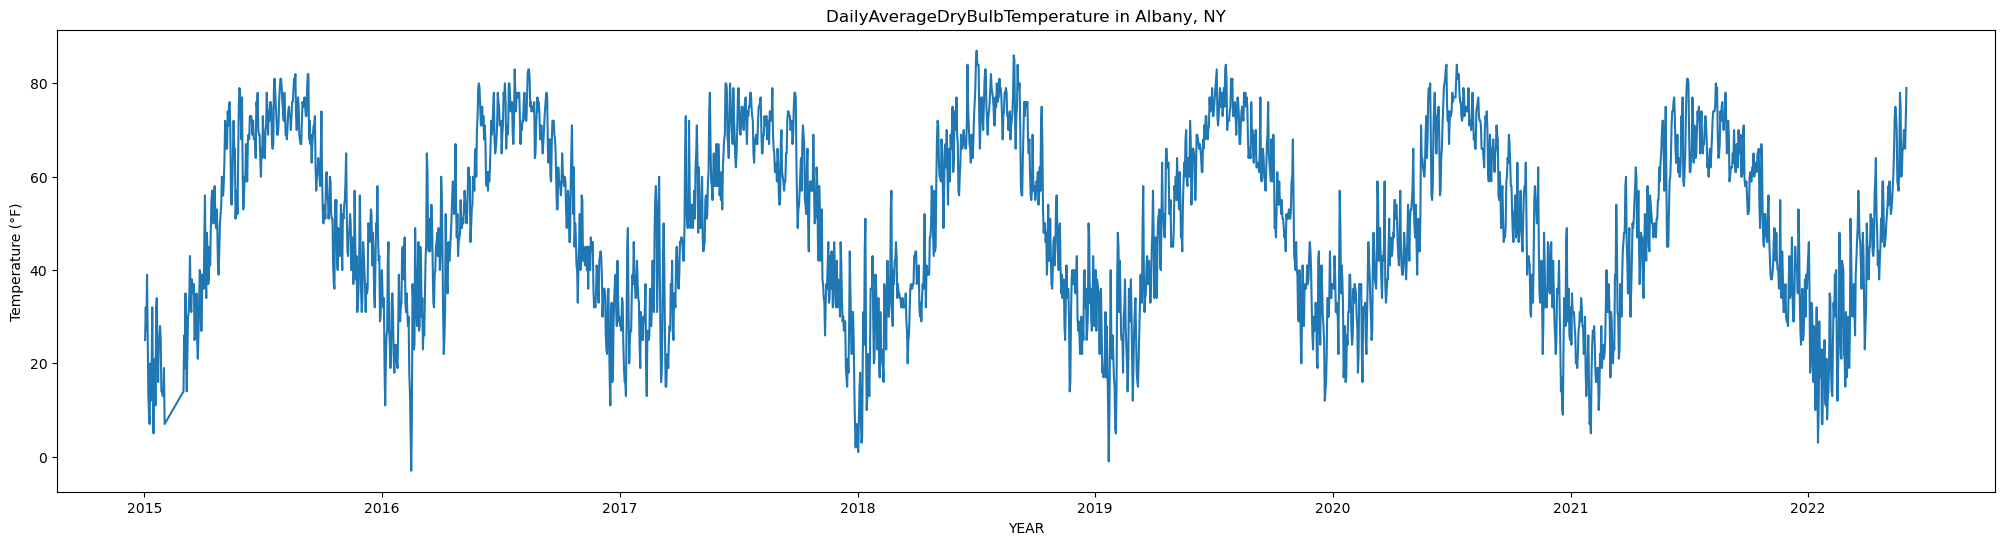

In [11]:
plt.figure(figsize=(25,6))
plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'])
plt.title('DailyAverageDryBulbTemperature in Albany, NY')
plt.xlabel('YEAR')
plt.ylabel('Temperature (°F)')
plt.show()

WIND SPEED RELATED GRAPHS/ANALYSIS

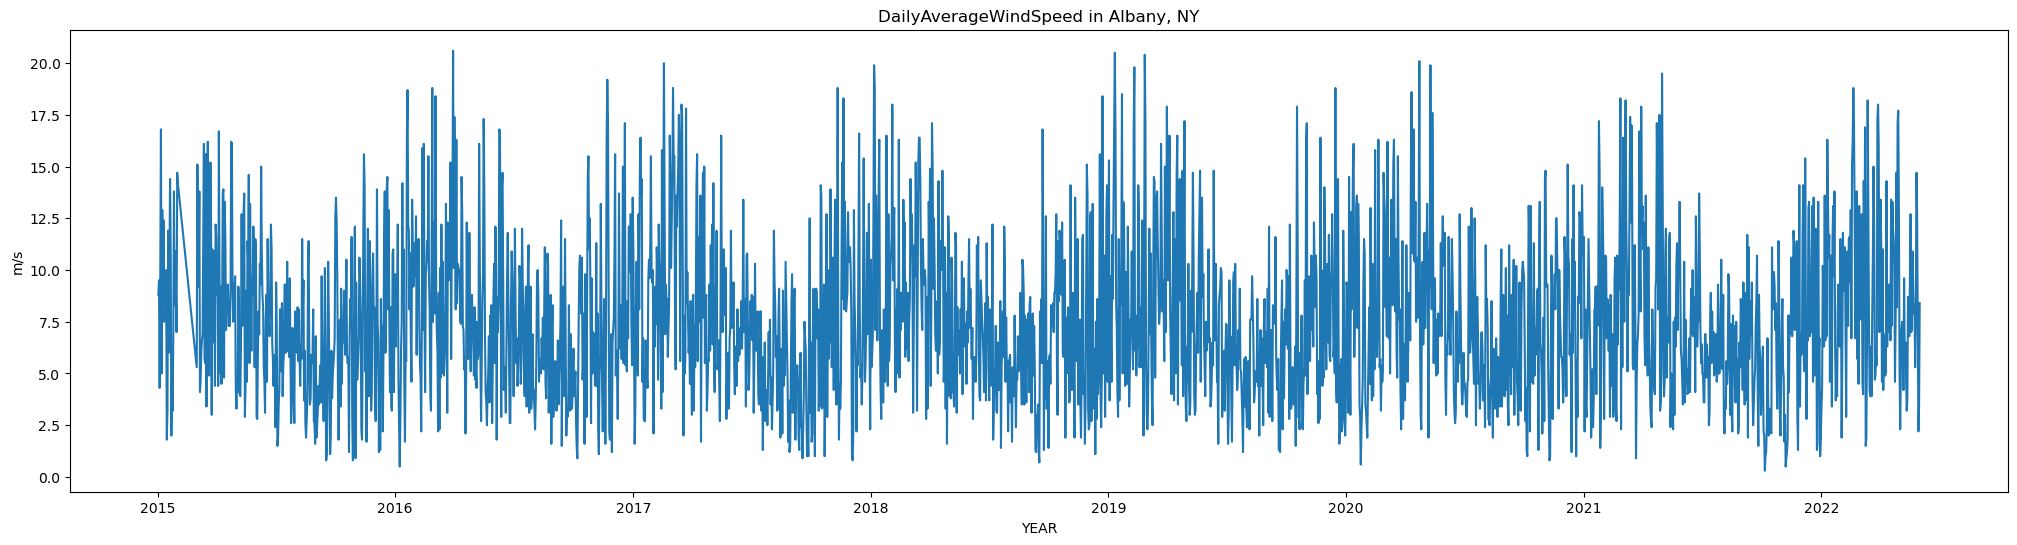

In [12]:
plt.figure(figsize=(25,6))
plt.plot(df['DATE'], df['DailyAverageWindSpeed'])
plt.title('DailyAverageWindSpeed in Albany, NY')
plt.xlabel('YEAR')
plt.ylabel('m/s')
plt.show()

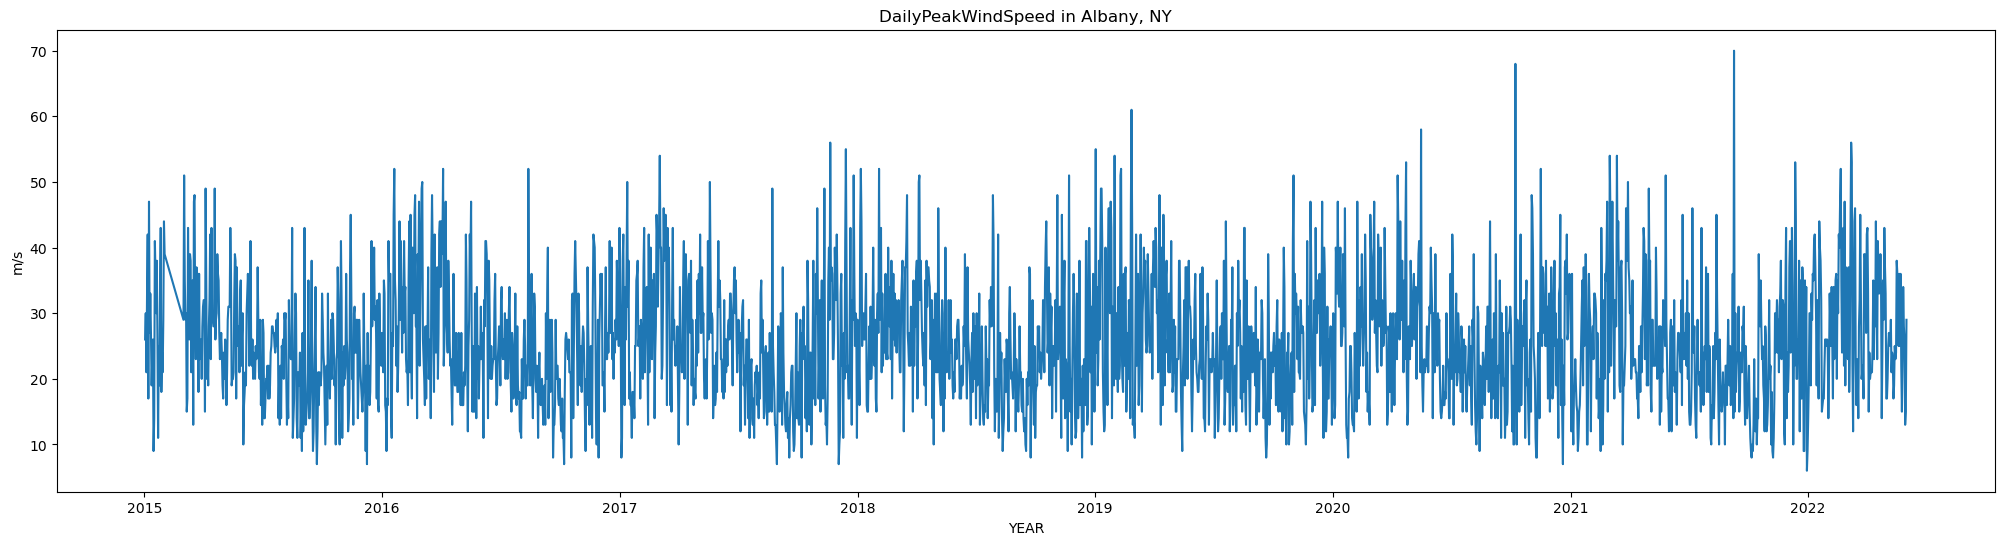

In [13]:
plt.figure(figsize=(25,6))
plt.plot(df['DATE'], df['DailyPeakWindSpeed'])
plt.title('DailyPeakWindSpeed in Albany, NY')
plt.xlabel('YEAR')
plt.ylabel('m/s')
plt.show()

WIND DIRECTION RELATED ANALYSIS

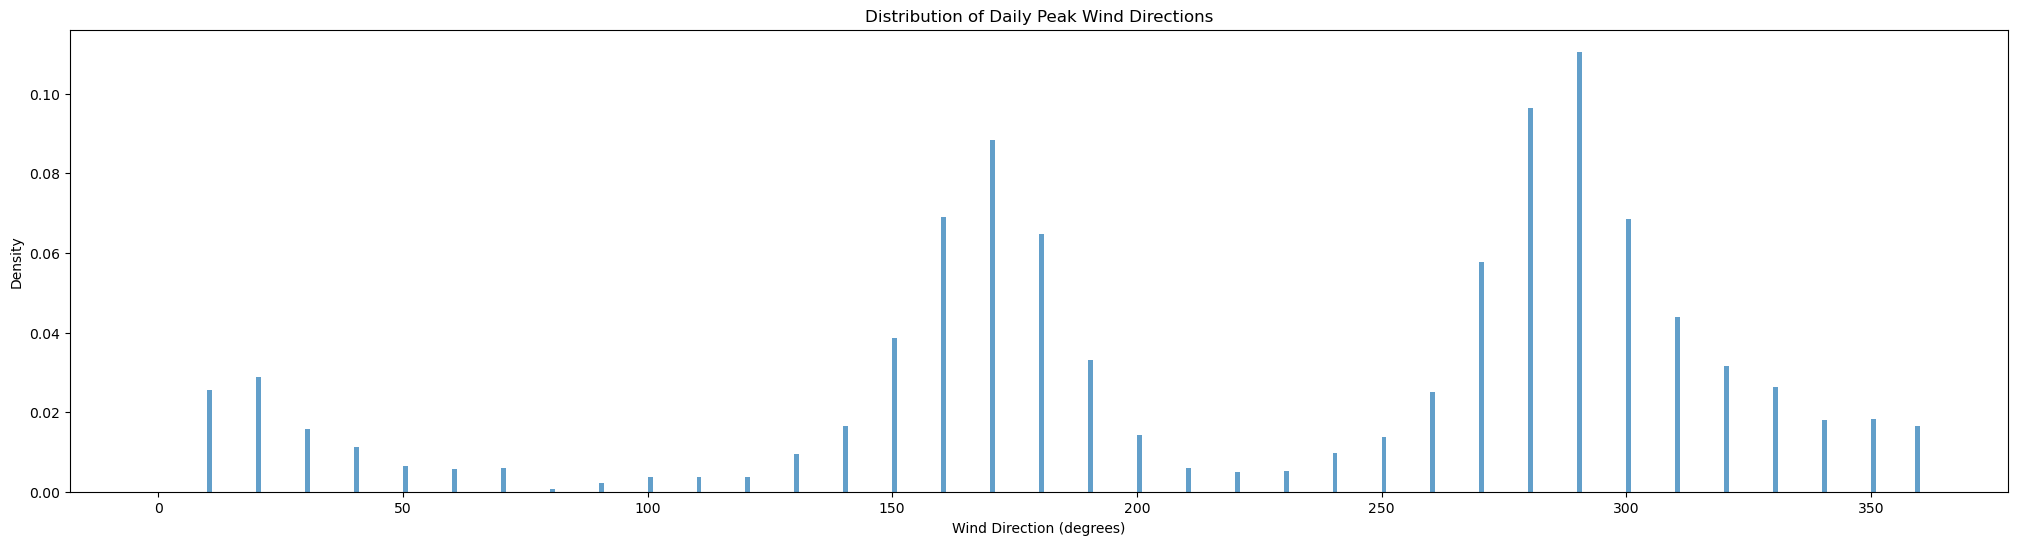

In [14]:
plt.figure(figsize=(25, 6))
plt.hist(df['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()

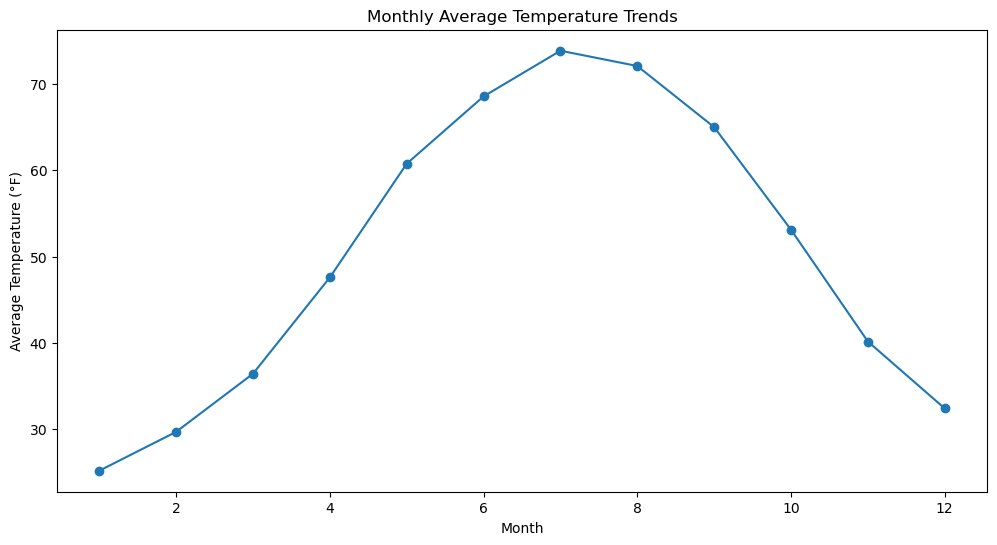

In [18]:
df['Month'] = df['DATE'].dt.month
monthly_temperature = df.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

In [21]:
average_daily_temperature = df.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()
print("Average Daily Temperature:")
print(average_daily_temperature)

Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64
